# **<span style="color:#0D47A1;">CAIXABANK HACKATHON - by Kevin Murgana </span>**
<img src="https://raw.githubusercontent.com/Kmurgana/Resources-Random/main/Images/CAIXABANK.jpg">

# **<span style="color:#0D47A1;">Objetivos</span>**

* 1. Desarrolla un modelo predictivo que permita predecir la variable target (si el precio de cierre del IBEX35 será superior o inferior al precio de cierre actual).

Para ello deberas entrenar tu modelo con los datos de training (si también se usan los tweets se sumaran 100 puntos) e introducir como input de tu modelo el dataset test_x para realizar las predicciones.

* Crea un breve documento (máx. 2 páginas) o presentación (máx. 4 slides) explicando la solución que has empleado y porque la has empleado.

**Roadmap**

Antes de lanzarnos de lleno a la programación, deberíamos trazar una breve guía para mantenernos en el camino. Los siguientes pasos constituyen la base de cualquier flujo de trabajo de aprendizaje automático una vez que tenemos un problema y un modelo en mente:

* 1) Plantear la pregunta y determinar los datos necesarios
* 2) Adquirir los datos en un formato accesible
* 3) Identificar y corregir los puntos de datos/anomalías que faltan, según sea necesario
* 4) Preparar los datos para el modelo de aprendizaje automático
* 5) Entrenar el modelo con los datos de entrenamiento
* 6) Hacer predicciones con los datos de prueba
* 7) Comparar las predicciones con los objetivos conocidos del conjunto de pruebas y calcular las métricas de rendimiento
* 8) Si el rendimiento no es satisfactorio, ajustar el modelo, adquiera más datos o pruebe otra técnica de modelización.
* 9) Interpretar el modelo y comunicar los resultados de forma visual y numérica

### ✅1) Planteando la pregunta ❓

El resultado del algoritmo deberá ser binario, si el precio está por encima o por debajo del precio actual, 50% y 50%, por lo que dividiremos el dataset en train y test y haremos las pruebas con el mismo dataset como referencia, mientras más elevado el **R2**, mejor será nuestra predicción.


### ✅ 2) Adquiriendo los datos 🔍

#### Importamos las librerías necesarias para comenzar.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, LSTM
import math
from sklearn.preprocessing import MinMaxScaler

### 2.1 Leyendo datos desde CSV

#### 2.1.1 Leyendo primer dato CSV (train.csv)

In [2]:
#1. Con pandas, importamos el dataset 1
train1_df = pd.read_csv("train.csv", sep=',')

In [3]:
#2.Observamos encabezado
train1_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Target
0,1994-01-03,3615.199951,3654.699951,3581.000000,3654.500000,3654.496338,0.0,0
1,1994-01-04,3654.500000,3675.500000,3625.100098,3630.300049,3630.296387,0.0,1
2,1994-01-05,3625.199951,3625.199951,3583.399902,3621.199951,3621.196289,0.0,1
3,1994-01-06,NaN,NaN,NaN,NaN,NaN,NaN,0
4,1994-01-07,3621.199951,3644.399902,3598.699951,3636.399902,3636.396240,0.0,1


In [4]:
#3.Observamos final del dataset
train1_df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,Target
6549,2019-05-24,9150.299805,9211.099609,9141.400391,9174.599609,9174.599609,121673100.0,0
6550,2019-05-27,9225.900391,9294.599609,9204.700195,9216.400391,9216.400391,60178000.0,0
6551,2019-05-28,9220.400391,9224.900391,9132.900391,9191.799805,9191.799805,218900800.0,0
6552,2019-05-29,9113.200195,9116.700195,9035.099609,9080.500000,9080.500000,148987100.0,0
6553,2019-05-30,9120.799805,9175.200195,9114.099609,9157.799805,9157.799805,101389200.0,0


In [5]:
#4.Observamos la información de las variables de cada columna.
train1_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6554 entries, 0 to 6553
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       6554 non-null   object 
 1   Open       6421 non-null   float64
 2   High       6421 non-null   float64
 3   Low        6421 non-null   float64
 4   Close      6421 non-null   float64
 5   Adj Close  6421 non-null   float64
 6   Volume     6421 non-null   float64
 7   Target     6554 non-null   int64  
dtypes: float64(6), int64(1), object(1)
memory usage: 409.8+ KB


In [6]:
#5.Describimos el dataset de ser posible
train1_df.describe()

,Open,High,Low,Close,Adj Close,Volume,Target
count,6421.000000,6421.000000,6421.000000,6421.000000,6421.000000,6.421000e+03,6554.000000
mean,8936.540448,9005.235576,8858.340567,8934.978558,8934.970624,8.218074e+07,0.516936
std,2732.102441,2749.009324,2712.511028,2731.032625,2731.030170,1.231845e+08,0.499751
min,2865.100098,2877.300049,2833.600098,2865.100098,2865.097168,0.000000e+00,0.000000
25%,7732.399902,7817.200195,7641.500000,7727.799805,7727.791992,0.000000e+00,0.000000
50%,9329.700195,9404.599609,9243.000000,9331.000000,9331.000000,1.966000e+05,1.000000
75%,10525.500000,10590.299805,10441.200195,10523.400391,10523.400391,1.773980e+08,1.000000
max,15999.200195,16040.400391,15868.599609,15945.700195,15945.683594,7.894902e+08,1.000000


In [7]:
#6. Sumamos todas aquellas variables nulas
train1_df.isnull().sum()

Date           0
Open         133
High         133
Low          133
Close        133
Adj Close    133
Volume       133
Target         0
dtype: int64

In [8]:
#7. Dropeando los NA para no incurrir en problemas futuros
train1_cleaned_df = train1_df.dropna()

In [9]:
train1_cleaned_df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
Target       0
dtype: int64

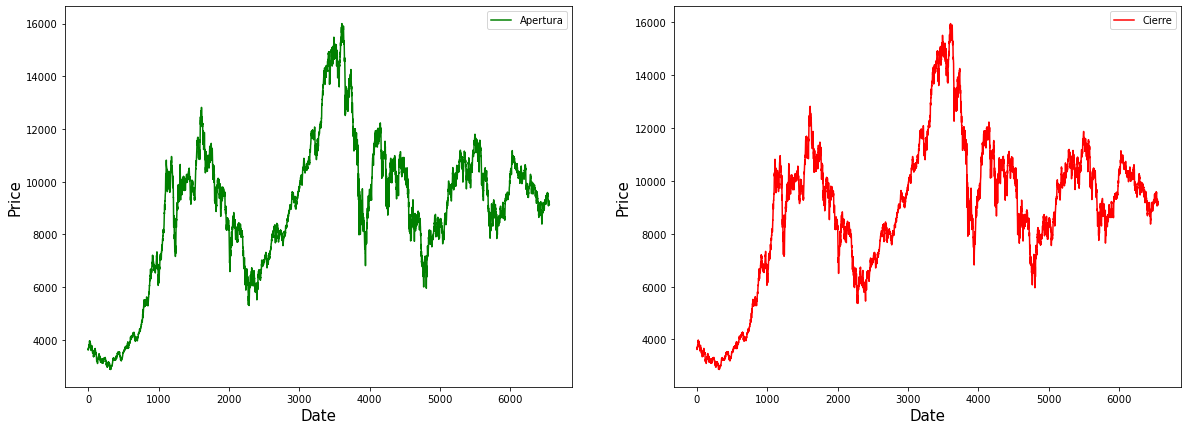

In [10]:
fg, ax =plt.subplots(1,2,figsize=(20,7))
ax[0].plot(train1_cleaned_df['Open'],label='Apertura',color='green')
ax[0].set_xlabel('Date',size=15)
ax[0].set_ylabel('Price',size=15)
ax[0].legend()

ax[1].plot(train1_cleaned_df['Close'],label='Cierre',color='red')
ax[1].set_xlabel('Date',size=15)
ax[1].set_ylabel('Price',size=15)
ax[1].legend()

plt.show()

### 2.1.2 Leyendo segundo dato CSV (tweets_from2015_#Ibex35.csv)

In [11]:
#1. Con pandas, importamos el dataset 1
train2_df = pd.read_csv("tweets_from2015_#Ibex35.csv", sep=',')

In [12]:
#2.Observamos encabezado
train2_df.head()

,tweetDate,handle,text
0,Sat Apr 09 14:47:45 +0000 2022,abelac62,He hecho el repaso de todos los componentes de...
1,Thu Apr 07 19:14:36 +0000 2022,LluisPerarnau,Els projectes que han presentat les empreses d...
2,Mon Apr 04 16:48:45 +0000 2022,Pegaso121080,"Por si no lo has visto, o no lo encuentras en ..."
3,Tue Apr 05 07:23:16 +0000 2022,zonavalue,📈 #BOLSA: El #Ibex35 abre en 🟢 \n\n🇪🇸 #Ibex35 ...
4,Thu Mar 31 16:07:43 +0000 2022,EPeconomia,"El #Ibex35 retrocede un 0,4% en marzo y un 3,0..."


In [13]:
train2_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9801 entries, 0 to 9800
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweetDate  9799 non-null   object
 1   handle     9798 non-null   object
 2   text       9797 non-null   object
dtypes: object(3)
memory usage: 229.8+ KB


In [14]:
train2_df.describe()

,tweetDate,handle,text
count,9799,9798,9797
unique,9780,2114,9763
top,Wed Jun 10 17:21:23 +0000 2020,Bolsacarlosmari,OJO HOY #VENCIMIENTOS \n\nHORARIO de #VENCIMIE...
freq,2,380,5


In [15]:
train2_df.isnull().sum()

tweetDate    2
handle       3
text         4
dtype: int64

In [16]:
train2_df = train2_df.dropna()

In [17]:
train2_df.columns

Index(['tweetDate', 'handle', 'text'], dtype='object')

In [18]:
train2_df[["text"]].head()

,text
0,He hecho el repaso de todos los componentes de...
1,Els projectes que han presentat les empreses d...
2,"Por si no lo has visto, o no lo encuentras en ..."
3,📈 #BOLSA: El #Ibex35 abre en 🟢 \n\n🇪🇸 #Ibex35 ...
4,"El #Ibex35 retrocede un 0,4% en marzo y un 3,0..."


In [19]:
train2_df["text"][0]

'He hecho el repaso de todos los componentes del #IBEX35 y ahora me pongo con lo de La Chiqui. Si mañana tengo tiempo, publicaré algún activo interesante del mercado europeo y americano. Buen fin de semana.'

### ✅  3) Adaptar la información, identificar y corregir anomalías 🔧

* Se utilizará la librería **NLT** para lenguaje natural (Natural Languaje Toolkit) con los métodos stopword y pr para analizar eficientemente los twits.
* En combinación con **NLT** se importará la librería **TextBlob** procesa texto y será capaz de generar algún tipo de "sentimiento" o "clasificación" del texto.

Finalmente el objetivo es obtener un **DATASET** con dos columnas, _fecha_ estandarizada bajo el mismo formato que el primer dataset y _sentimiento_ (0 baja y 1 alza) 

In [20]:
import string
import re
import nltk
from nltk.util import pr
from nltk.corpus import stopwords
import warnings
from textblob import TextBlob
warnings.filterwarnings('ignore')
stemmer = nltk.SnowballStemmer("spanish")
nltk.download('stopwords')
stopword=set(stopwords.words('spanish'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Kevin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [21]:
train2_cleaned_df = train2_df.copy(deep=True)#Hacemos un backup del train2_df

In [22]:
def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text

In [23]:
train2_cleaned_df["text"] = train2_cleaned_df["text"].apply(clean)

In [24]:
train2_cleaned_df["text"][0]

'hech repas component  ahor pong chiqui si mañan tiemp public algun activ interes merc europe american buen fin seman'

In [25]:
train2_df["text"][0]

'He hecho el repaso de todos los componentes del #IBEX35 y ahora me pongo con lo de La Chiqui. Si mañana tengo tiempo, publicaré algún activo interesante del mercado europeo y americano. Buen fin de semana.'

In [26]:
def analyze_sentiment(tweet):
    """Análisis subjetivo de sentimiento del tweet"""
    analysis = TextBlob(clean(tweet))
    if analysis.sentiment.subjectivity > 0:
        return 1
    elif analysis.sentiment.subjectivity == 0:
        return 0
    else:
        return -1

In [27]:
train2_cleaned_df['Sentiment'] = train2_cleaned_df['text'].apply(lambda x:analyze_sentiment(x))

In [28]:
train2_cleaned_df

,tweetDate,handle,text,Sentiment
0,Sat Apr 09 14:47:45 +0000 2022,abelac62,hech repas component ahor pong chiqui si maña...,1
1,Thu Apr 07 19:14:36 +0000 2022,LluisPerarnau,els project presentat empres als fons nextgen...,0
2,Mon Apr 04 16:48:45 +0000 2022,Pegaso121080,si vist encuentr busqued suel pas 🤔analisis ni...,1
3,Tue Apr 05 07:23:16 +0000 2022,zonavalue,📈 bols abre 🟢 🇪🇸 🔼 puntosmayor subidasaen...,0
4,Thu Mar 31 16:07:43 +0000 2022,EPeconomia,retroced marz prim trimestr,0
...,...,...,...,...
9796,Thu Jan 08 16:41:36 +0000 2015,elEconomistaes,cierr sub punt,0
9797,Sat Jan 03 17:20:30 +0000 2015,Roger_bolsa,vistaz bluechips ibex analisis bancosantand i...,0
9798,Sat Jan 10 19:42:45 +0000 2015,Secretosdebolsa,asi comienz bols ojo soport europ especial es...,0
9799,Sat Jan 10 21:47:17 +0000 2015,Roger_bolsa,analisis bancosantand santand san tras desplom...,0


In [29]:
train2_cleaned_df["Sentiment"].unique() #No nos quedaron sentimientos sin asignar, todos son 1 o 0

array([1, 0], dtype=int64)

In [30]:
train2_cleaned_df["text"][2]

'si vist encuentr busqued suel pas 🤔analisis nivel  vari accion youtub ezentis aedashom lleidanet merlinpropertis bbva much canal 🧐🙏esper gust ayud 🔄'

Transformamos la fecha de columna "tweetDate" al mismo formato que el dataset original (AÑO-MES-DÍA)

In [31]:
#todos aquellos datos que no sean fechas los rellenamos con NAN
train2_cleaned_df['Date'] = pd.to_datetime(train2_cleaned_df['tweetDate'], errors='coerce')

In [32]:
train2_cleaned_df = train2_cleaned_df.dropna(subset=['Date'])

In [33]:
train2_cleaned_df['Date']

0      2022-04-09 14:47:45+00:00
1      2022-04-07 19:14:36+00:00
2      2022-04-04 16:48:45+00:00
3      2022-04-05 07:23:16+00:00
4      2022-03-31 16:07:43+00:00
                  ...           
9796   2015-01-08 16:41:36+00:00
9797   2015-01-03 17:20:30+00:00
9798   2015-01-10 19:42:45+00:00
9799   2015-01-10 21:47:17+00:00
9800   2015-01-05 15:06:49+00:00
Name: Date, Length: 9793, dtype: datetime64[ns, UTC]

In [34]:
d=str(train2_cleaned_df['Date'])

In [35]:
date = [] #pasamos a array las fechas
for i in train2_cleaned_df['Date']: #recorremos cada una de las fechas
    date.append(pd.to_datetime(i).date())#apendizamos las fechas en un array

In [36]:
train2_cleaned_df['Date'] = date #Con esto coincidimos los formatos de las fechas

In [37]:
train2_cleaned_df = train2_cleaned_df.drop(['tweetDate', 'handle','text'], axis = 1) #limpiamos las columnas que no nos interesan

In [38]:
a = train2_cleaned_df.drop("Sentiment", 1) #reacomodamos las columnas para que quede sentiment al final
b = train2_cleaned_df["Sentiment"]
train2_twit_sent_df= pd.concat([a, b], axis = 1)

In [39]:
train2_twit_sent_df.head(2) #Obtenemos nuestro dataset de los sentimientos 1 si es "subjetivamente postivio" y 0 si es "subjetivamente negativo"

,Date,Sentiment
0,2022-04-09,1
1,2022-04-07,0


### ✅  4) Preparar datos para training y testing 🏃‍♂️

In [40]:
# 1. Filtramos los datos de cierre de mercado
close_data = train1_cleaned_df.filter(['Close'])

In [41]:
# 2. Convertimos los datos a array para una evaluación más rápida
dataset = close_data.values

In [42]:
# 3. Normalizamos los datos para que todos los valores estén entre 0 y 1
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

In [43]:
# 4. Creamos el dataset de training con el 70% de los datos
training_data_len = math.ceil(len(dataset) *.7)
train_data = scaled_data[0:training_data_len  , : ]

In [44]:
# 5. Separamos los datos entre x e y respectivamente para entrenar el modelo
x_train_data=[]
y_train_data =[]
for i in range(60,len(train_data)):#tomamos los últimos 60 días para hacer la predicción de 3 días a posteriori
    x_train_data=list(x_train_data)
    y_train_data=list(y_train_data)
    x_train_data.append(train_data[i-60:i,0]) 
    y_train_data.append(train_data[i,0])
 
    # 6. Convertimos los valores de x e y en arrays de numpy
    x_train_data1, y_train_data1 = np.array(x_train_data), np.array(y_train_data)
 
    # 7. Transformamos el formato de los array para facilitar los futuros cálculos
    x_train_data2 = np.reshape(x_train_data1, (x_train_data1.shape[0],x_train_data1.shape[1],1))


### ✅ 5) Entrenar el modelo con los datos de entrenamiento🏋️‍♀️

Para resolver de manera eficiente el problema de la predicción, utilizaremos una Red Neuronal Recurrente llamada **LSTM**, este tipo de red está precisamente enfocada para algoritmos de predicción de _stocks_, donde los datos históricos son constantemente actualizados y por ende, cualquier algoritmo de Machine Learning basado en indicadores, llámese "support vector machines, decision trees, principal component analysis, random forest, ensemble methods etc." no serían tan eficientes dado que la hipótesis de estos analizadores no siempre es correcta y no generan un resultado ideal.
Por otro lado **LSTM** es una red neuronal que utiliza 3 "puertas" para modificar e ir actualizando constánemente la célula o núcleo de los precios/volúmen, etc. que comprende esta red neuronal, y por ende permite prescindir de cualquier indicador calculado previament.

#### 5.1.1Construyendo el modelo LSTM

##### Long Short-Term Memory (LSTM) 

El modelo LSTM estandar, utilizado para estos análisis contiene dos capas LSTM con 50 neuronas y dos capas densas, una con 25 neuronas y la otra con una neurona.

In [45]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True,input_shape=(x_train_data2.shape[1],1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))

Se utilizará para el cálculo de la función de pérdida "loss" el error cuadrático medio (MSE) y para el optimizador el optimizador será el de "Adam" (Adaptive Moment Estimation) puesto que para este caso, es uno de optimizadores más eficientes combinando las capacidades de otros dos optimizadores como el AdaGrad y RMSProp.

#### 5.1.2 Compilando el modelo

In [46]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train_data2, y_train_data1, batch_size=1, epochs=1)

4435/4435 [==============================] - 63s 14ms/step - loss: 0.0011


### ✅ 6) Hacer predicciones con los datos de prueba 🤔

#### 6.1 Probando el modelo en los datos de prueba

In [47]:
# 1. Crear el dataset para testing
test_data = scaled_data[training_data_len - 60: , : ]
x_test = []
y_test =  dataset[training_data_len : , : ]
for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])

In [48]:
# 2.  Convertir los valores en arrays para facilitar el cálculo
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

In [49]:
# 3. Realizando predicciones con el 30% de testing
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

61/61 [==============================] - 1s 8ms/step


#### 6.2 Cálculo de los errores

In [50]:
RMSE = np.sqrt(np.mean(((predictions - y_test)**2))) #Error cuadrático medio
SSR = sum((predictions-np.mean(y_test))**2) #Suma de las diferencias cuadradas (SSR)
SSE = sum((predictions-y_test)**2)  #Error de suma de cuadrados (SSE)
SST = sum(((y_test-np.mean(y_test))**2)) #Suma de cuadrados totales (SST)
R2 = SSR/SST 

In [51]:
print("Los errores en las predicciones obtenidos son: RMSE = %.2f SSR = %.2f, SSE = %.2f, SST = %.2f, R2 = %.2f" %(RMSE, SSR, SSE, SST, R2))  

Los errores en las predicciones obtenidos son: RMSE = 235.97 SSR = 2838104576.00, SSE = 107247487.02, SST = 2529704251.28, R2 = 1.12


### ✅ 7) Comparar predicciones con datos de prueba📝

Para esta etapa, y dado que el resultado que estamos buscando es dicreto, podemos hacer uso de las **métricas de sklearn para clasificación**.

In [52]:
from sklearn.metrics import classification_report
from sklearn import metrics

#### 7.1 Realizamos plot de predicción contínua

In [53]:
data = train1_cleaned_df.copy(deep=True)

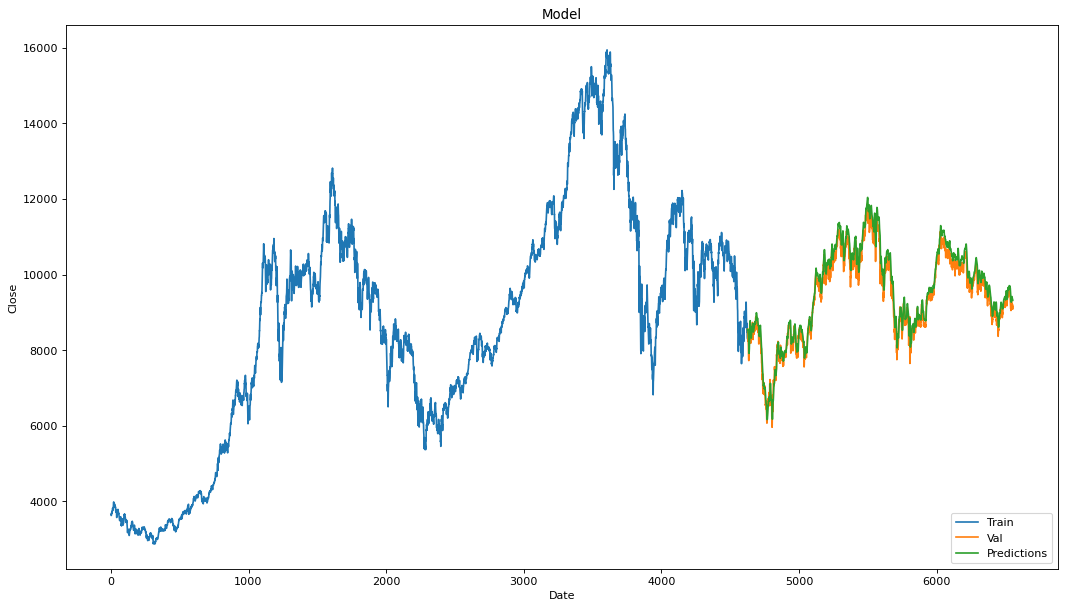

In [54]:
train = data.iloc[:training_data_len,:]
valid = data.iloc[training_data_len:,:]
%matplotlib inline 
valid['Predictions'] = predictions

plt.figure(figsize=(16, 9), dpi=80)    
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Close')
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')


#### 7.2 Discretizamos la medición contínua (alza o baja)

In [55]:
valid['Target_pred'] = np.where((valid["Predictions"]>valid["Close"]), 1, 0)

In [56]:
valid

,Date,Open,High,Low,Close,Adj Close,Volume,Target,Predictions,Target_pred
4626,2011-11-11,8301.700195,8580.099609,8263.200195,8556.099609,8556.090820,192929000.0,0,8539.807617,0
4627,2011-11-14,8615.799805,8616.900391,8341.500000,8372.200195,8372.191406,154797000.0,0,8554.090820,1
4628,2011-11-15,8316.700195,8333.200195,8191.700195,8237.599609,8237.590820,197888000.0,1,8548.769531,1
4629,2011-11-16,8213.400391,8415.700195,8213.299805,8304.099609,8304.090820,173684000.0,0,8504.437500,1
4630,2011-11-17,8272.400391,8335.900391,8200.299805,8270.599609,8270.590820,190560000.0,0,8472.457031,1
...,...,...,...,...,...,...,...,...,...,...
6549,2019-05-24,9150.299805,9211.099609,9141.400391,9174.599609,9174.599609,121673100.0,0,9378.382812,1
6550,2019-05-27,9225.900391,9294.599609,9204.700195,9216.400391,9216.400391,60178000.0,0,9353.162109,1
6551,2019-05-28,9220.400391,9224.900391,9132.900391,9191.799805,9191.799805,218900800.0,0,9348.588867,1
6552,2019-05-29,9113.200195,9116.700195,9035.099609,9080.500000,9080.500000,148987100.0,0,9346.252930,1


In [57]:
compare_df = pd.concat([valid['Target'], valid['Target_pred']], axis = 1)

array([<AxesSubplot:ylabel='Target'>, <AxesSubplot:ylabel='Target_pred'>],
      dtype=object)

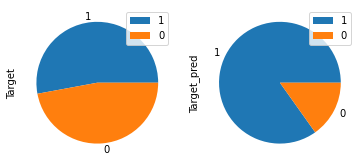

In [58]:
compare_df.apply(pd.value_counts).plot.pie(subplots=True)

In [59]:
print(classification_report(valid['Target'], valid['Target_pred'], target_names=["Reales", "Predicciones"]))

              precision    recall  f1-score   support

      Reales       0.40      0.13      0.20       907
Predicciones       0.52      0.83      0.64      1019

    accuracy                           0.50      1926
   macro avg       0.46      0.48      0.42      1926
weighted avg       0.46      0.50      0.43      1926



Vemos que la presición final del modelo para predicciones **binarias** es de un 52% lo cual tiene sentido, pues a esto se le debe sumar el "sentimiento subjetivo" de los usuarios de twitter.

### ✅ 8) Realizar predicciones finales con (test_x.csv) 🔨

#### 8.1 Importamos dataset a predecir y analizamos si está todo OK

In [60]:
#1. Con pandas, importamos el dataset 1
test_x_df = pd.read_csv("test_x.csv", sep=',')

In [61]:
#2.Observamos encabezado
test_x_df.head()

,test_index,Date,Open,High,Low,Close,Adj Close,Volume
0,6557,2019-06-05,9136.799805,9173.400391,9095.000000,9150.500000,9150.500000,158753000.0
1,6558,2019-06-06,9169.200195,9246.200195,9136.700195,9169.200195,9169.200195,212720900.0
2,6559,2019-06-07,9186.700195,9261.400391,9185.700195,9236.099609,9236.099609,150664700.0
3,6560,2019-06-10,9284.200195,9302.200195,9248.099609,9294.099609,9294.099609,102323700.0
4,6561,2019-06-11,9288.599609,9332.500000,9273.400391,9282.099609,9282.099609,144701200.0


In [62]:
#3.Observamos final del dataset
test_x_df.tail()

,test_index,Date,Open,High,Low,Close,Adj Close,Volume
721,7278,2022-03-25,8314.099609,8363.200195,8286.500000,8330.599609,8330.599609,156189000.0
722,7279,2022-03-28,8354.400391,8485.700195,8354.400391,8365.599609,8365.599609,167961800.0
723,7280,2022-03-29,8451.000000,8621.000000,8419.700195,8614.599609,8614.599609,257812200.0
724,7281,2022-03-30,8583.299805,8597.400391,8508.900391,8550.599609,8550.599609,185389000.0
725,7282,2022-03-31,8562.599609,8588.299805,8445.099609,8445.099609,8445.099609,220117500.0


In [63]:
#4.Observamos la información de las variables de cada columna.
test_x_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 726 entries, 0 to 725
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   test_index  726 non-null    int64  
 1   Date        726 non-null    object 
 2   Open        726 non-null    float64
 3   High        726 non-null    float64
 4   Low         726 non-null    float64
 5   Close       726 non-null    float64
 6   Adj Close   726 non-null    float64
 7   Volume      726 non-null    float64
dtypes: float64(6), int64(1), object(1)
memory usage: 45.5+ KB


In [64]:
#5.Describimos el dataset de ser posible
test_x_df.describe()

,test_index,Open,High,Low,Close,Adj Close,Volume
count,726.000000,726.000000,726.000000,726.000000,726.000000,726.000000,7.260000e+02
mean,6919.500000,8399.936418,8458.035202,8332.158471,8396.085609,8396.085609,2.086387e+08
std,209.722436,899.325142,886.671165,916.904022,903.320144,903.320144,1.015796e+08
min,6557.000000,6223.700195,6362.500000,5814.500000,6107.200195,6107.200195,3.543620e+07
25%,6738.250000,7848.675049,7963.874878,7762.924805,7857.675171,7857.675171,1.472686e+08
50%,6919.500000,8673.950195,8725.250000,8609.750000,8672.399902,8672.399902,1.827458e+08
75%,7100.750000,9077.599609,9124.224854,9001.125244,9077.375244,9077.375244,2.340954e+08
max,7282.000000,10048.700195,10100.200195,10020.700195,10083.599609,10083.599609,9.752120e+08


In [65]:
#6. Sumamos todas aquellas variables nulas
test_x_df.isnull().sum()

test_index    0
Date          0
Open          0
High          0
Low           0
Close         0
Adj Close     0
Volume        0
dtype: int64

In [66]:
# 7. Filtramos los datos de cierre de mercado
close_data = test_x_df.filter(['Close'])

In [67]:
# 8. Convertimos los datos a array para una evaluación más rápida
dataset = close_data.values

In [68]:
# 9. Normalizamos los datos para que todos los valores estén entre 0 y 1
scaled_data = scaler.fit_transform(dataset)

#### 8.2 Adaptamos los datos y realizamos predicciones

In [69]:
# 1. Filtramos los últimos 60 días (la predicción ya está realizada con el data set entero)
x_test = []
for i in range(60,len(scaled_data)):
    x_test.append(scaled_data[i-60:i,0])

In [70]:
# 2.  Convertir los valores en arrays para facilitar el cálculo
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

In [71]:
# 3. Realizando predicciones con los t
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

21/21 [==============================] - 0s 8ms/step


In [72]:
test_x_cut_df = test_x_df.iloc[len(x_test):,:]#Nos quedamos con los últios 60 días para realizar la predicción final

In [73]:
test_x_cut_df["Predictions"] = predictions[606:] #Agregamos las predicciones de los últimos 60 días.

#### 8.3 A las predicciones le aplicamos el "Sentimiento de Twitter" 

In [74]:
train_twit_df=train2_twit_sent_df.copy()

In [75]:
import time #Para hacer las comparaciones de fecha

In [76]:
Sentiment = []
index = 0
for i in test_x_cut_df["Date"]:
    count = 0 #Reseteamos el conteo de días que se repite el mismo tweet
    suma = 0  #Reseteamos la suma 
    mean = 0  #Reseteamos el promedio de esta fecha
    index += 1 #incrementamos el indice en uno
    for j in train_twit_df["Date"]:#Recorremos todos los sentimientos y buscamos aquellas fechas que coinciden
        date1 = time.strptime(i, "%Y-%m-%d")
        date2 =  j
        date1 is date2
        count += 1
        suma = suma + train_twit_df.iloc[index,1]
    mean = suma / count #Calculamos el promedio de sentimientos en el dia que se realizaron los Twitts         
    Sentiment.append(mean) #apendizamos el promedio de sentimientos para ese día.

    #test_x_cut_df['Sentiment'] = train_twit_df["Sentiment"][j]

In [77]:
test_x_cut_df['Target'] = np.where(((test_x_cut_df["Predictions"])>test_x_cut_df["Close"]), 1, 0)

In [78]:
#test_x_cut_df['Target'] = test_x_cut_df["Target"]+Sentiment

In [79]:
test_x_cut_df['Target'] = np.where(((test_x_cut_df["Target"]+Sentiment)>=1), 1, 0) #Cuando hay sentimiento positivo, entonces la predicción será positiva

### ✅ 9) Presentar resultados🌟

#### 9.1 Guardamos los resultados según lo especificado bajo formato csv

In [80]:
predictions = pd.concat([test_x_cut_df["test_index"], test_x_cut_df["Target"]], axis = 1)

In [81]:
predictions.to_csv("predictions.csv", index=False)

In [82]:
predictions_observ = pd.read_csv("predictions.csv", sep=',')#Observamos que el resultado se halla guardado correctamente

In [83]:
predictions_observ.head() #Datos guardados exitosamente

,test_index,Target
0,7223,1
1,7224,1
2,7225,1
3,7226,1
4,7227,0


#### 9.2 Guardamos los resultados según lo especificado bajo formato json

In [84]:
predictions_json = predictions.copy() #Realizamos la copia

In [85]:
A = np.array(predictions["test_index"])
B = np.array(predictions["Target"])
#C = np.concatenate([A, B])
C = np.stack([A, B]).reshape(-1)

In [86]:
data = {'test_index': A,
        'Target': B
        }

In [87]:
predictions_json = pd.DataFrame(data, columns = ['test_index', 'Target'])

In [88]:
data = predictions_json.to_json('./predictions.json')

In [89]:
df = pd.read_json('predictions.json')

In [90]:
df.head() #Ok el archivo se ha guardado exitosamente

,test_index,Target
0,7223,1
1,7224,1
2,7225,1
3,7226,1
4,7227,0
